In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credicard-dataset/creditcard.csv




# Logistic Regression
It will be used for Classification/prediction

We need to use Categorical Data

3 Types of Logistic Regression are there-Binomial,Multinomial and Ordinal

Binomial-True or False ,0 or 1

Multinomial- Multiple Categories-cat,dog,sheep

Ordinal- Independent and Dependent Variable High,Low ,Medium

Implementing Binomial Logistic Regression
To read CSV file


In [2]:
#for numeric functions
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LogisticRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA


# Reading csv file

Data Gathering

When we have a lot of data(Bigger dataset) processing takes time

If we run the data in loop for 4 times it will take a lot of time to load

We can use nrows(Parameter for number of rows) to select required number of rows as the dataset is very big

In [3]:
data=pd.read_csv("/kaggle/input/credicard-dataset/creditcard.csv",nrows=150000)
print("Dataset is:\n",data)
print("\nColumns of dataset are:\n",data.columns)
print("\nInformation of dataset is::\n",data.info)

Dataset is:
          Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
149995  92345  1.724254  0.054124  0.625215  4.308400 -0.532295  0.540379   
149996  92346 -3.538487  2.921360 -1.298732 -1.035773 -0.030572 -0.441956   
149997  92347 -0.019481  1.224302 -0.132075 -0.678606  1.768679 -0.283992   
149998  92348 -0.511063  1.277683 -0.174698 -0.101018  0.970555 -1.040956   
149999  92348  2.197093 -0.429996 -1.439194 -0.307975 -0.020266 -0.715370   

              V7        V8        V9  ...       V21       V22 

**Handling missing data**

We have to drop the data

If we have smaller dataset ,we take mean of that column and update missing value with that

Using this we can avoid outliers

Separating as input and output


In [4]:
X,Y=data.drop(['Class'],axis=1),data['Class']
print("Input is:\n",X,"\nOutput is:\n",Y)
print("\nShape of Input data is:",X.shape,"Shape of Output data is:",Y.shape)

Input is:
          Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
149995  92345  1.724254  0.054124  0.625215  4.308400 -0.532295  0.540379   
149996  92346 -3.538487  2.921360 -1.298732 -1.035773 -0.030572 -0.441956   
149997  92347 -0.019481  1.224302 -0.132075 -0.678606  1.768679 -0.283992   
149998  92348 -0.511063  1.277683 -0.174698 -0.101018  0.970555 -1.040956   
149999  92348  2.197093 -0.429996 -1.439194 -0.307975 -0.020266 -0.715370   

              V7        V8        V9  ...       V20       V21   

**Splitting dataset for training and testing**

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)
print("Training data is:\n",x_train,"\nTesting data is:\n",y_test)
print("Shape of Training data is:",x_train.shape,"shape of Testing Data is:",y_test.shape)

Training data is:
          Time        V1        V2        V3        V4         V5        V6  \
120744  75944  1.159777 -0.166248  1.247189  1.359354  -1.161356 -0.250870   
14854   26133  1.211847  0.358938  0.341317  0.569923  -0.240862 -0.727011   
26416   34054  1.139514  0.177208  0.358040  0.589656  -0.304628 -0.410195   
37088   38801  1.274898  0.144608  0.178162  0.315388  -0.059709 -0.205599   
147067  88084 -1.691102 -0.998313 -0.284547 -0.458575   1.840380 -1.193486   
...       ...       ...       ...       ...       ...        ...       ...   
102110  68056 -2.652571 -2.539808 -1.374688  3.719270 -11.879826  7.804425   
137619  82250  1.231154 -0.078989  0.571043 -0.109738  -0.597072 -0.549801   
101438  67834  0.348415  0.757397  1.118159  0.799891   0.169821 -0.195680   
38623   39465  1.193031 -0.234031  0.564732 -0.211229  -0.680901 -0.270389   
127053  78192 -0.605828  1.243026  0.219685 -0.412236   0.580958  0.254113   

               V7        V8        V9  ...  

**Taking Algorithm**

Since the dataset is very large it is showing maximum number of iterations reached
To avoid this we set max_iter parameter to our requirement

In [6]:
log_reg=LogisticRegression(max_iter=150000)
# Training Algorithm
log_reg.fit(x_train,y_train)


LogisticRegression(max_iter=150000)

**Evaluating model**

In [7]:
pred=log_reg.predict(x_test)
print("Predicted Values are:\n",pred)
print("\nLength of Predicted values is:",len(pred))
print("\nTraining Accuracy score is:",log_reg.score(x_train,y_train)*100)
# Very good accuracy and also not overfitted
print("\nTesting Accuracy score is:",accuracy_score(y_test,pred)*100)Seeing the count of 0 and 1
We do not need to focus on this

Predicted Values are:
 [0 0 0 ... 0 0 0]

Length of Predicted values is: 45000

Training Accuracy score is: 99.88095238095238

Testing Accuracy score is: 99.8888888888889


Seeing the count of 0 and 1

We do not need to focus on this

In [8]:
print("Count of 0 or not fraud cases in dataset is:",list(Y).count(0))
# This is our main focus
print("Count of 1 or fraud cases in dataset is:",list(Y).count(1))

Count of 0 or not fraud cases in dataset is: 149707
Count of 1 or fraud cases in dataset is: 293


We have many parameters to decide fraud data

More Information about dataset

Doing PCA for dimension reduction

In [9]:
pca=PCA(2)
x=pca.fit(x_test).transform(x_test)
print("Transformed Data is:\n",x)
print("\nShape of Transformed data is:",x.shape)

Transformed Data is:
 [[-16199.88141591    -69.29534252]
 [ 42344.11560667    -92.82909182]
 [ 19389.11543925    -91.54245937]
 ...
 [ 51985.11524153    -95.4339144 ]
 [-31403.81957446    315.75895731]
 [-33760.88320193    -78.86917   ]]

Shape of Transformed data is: (45000, 2)


**Plotting Dataset**

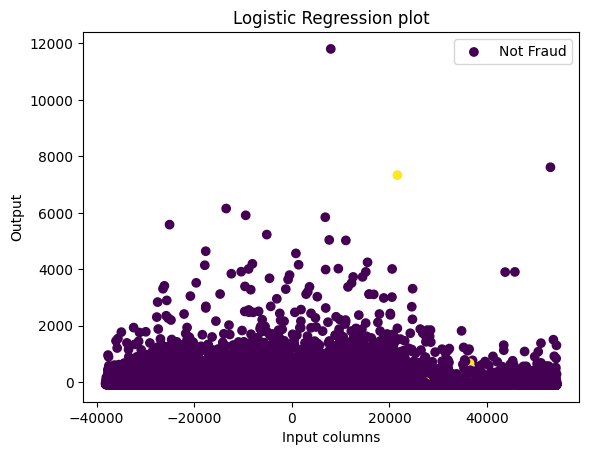

In [10]:
plt.scatter(x[:,0],x[:,1],c=pred)
plt.legend(['Not Fraud'])
plt.xlabel("Input columns")
plt.ylabel("Output")
plt.title("Logistic Regression plot")
plt.show()